# Analytical solutions to burger's equation

In [3]:
import numpy as np
from matplotlib import pylab as plt

In [10]:
def make_linear(a,b):
    def linear(x,t):
        return (a*x+b)/(a*t+1)
    return linear

In [33]:
def riemann(uL,uR):
    def sol(x,t):
        if uL>=uR:
            S = 0.5*(uL+uR)
            return uL if x<S*t else uR
        else:
            if(x<uL*t): return uL
            if(x>=uR*t): return uR
    
            f = (x/t - uL)/(uR-uL);
            return (1.0-f)*uL + f*(uR)
    return np.vectorize(sol)

In [92]:
@np.vectorize
def parabola(x,t):
    if t==0.0:
        return 1.0-x**2.0
    else:
        return 1.0 - (1.0-np.sqrt(1.0+4.0*t*(t-x)) )**2.0 / (2.0*t)**2.0

In [93]:
xs = np.linspace(-1,1,21)
ts = np.linspace(0,1,10)
grid = np.meshgrid(xs,ts)

In [94]:
SOLS = [
    make_linear(1,2),
    make_linear(-0.9,0),
    make_linear(1,0),
    riemann(1.0,2.0),
    riemann(2.0,1.0),
    riemann(1.0,0.0),
    riemann(0.5,0.1),
    riemann(-2.0,0.0),
    riemann(0.0,1.0),
    riemann(0.0,2.0),
    parabola
]

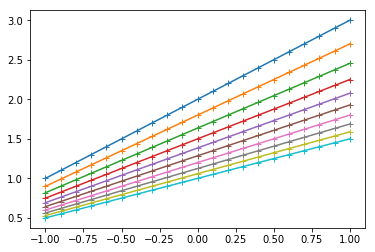

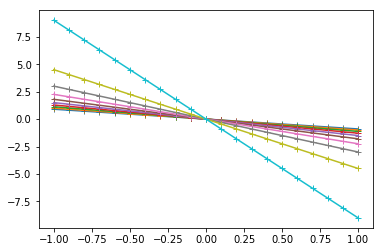

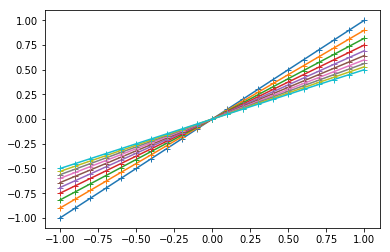

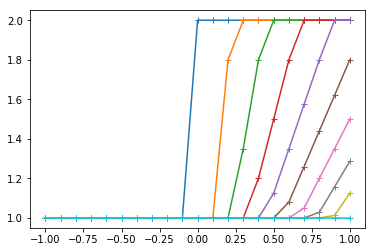

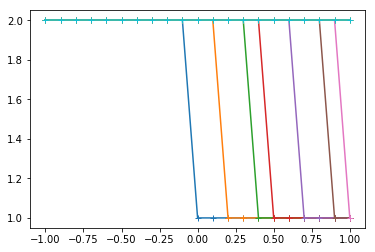

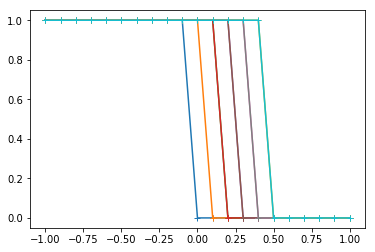

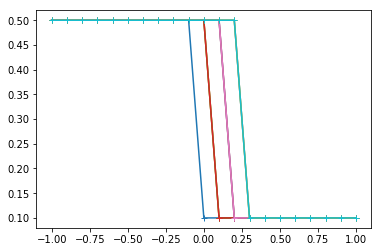

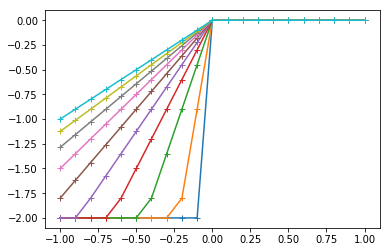

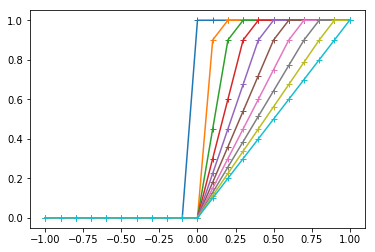

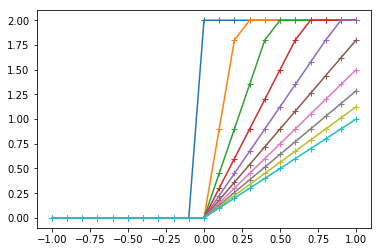

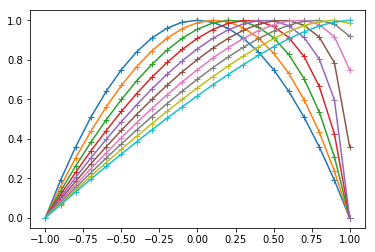

In [95]:
US = []
for S in SOLS:
    u = S(grid[0],grid[1])
    plt.figure()
    for i,t in enumerate(ts):
        plt.plot(xs,u[i,:],'-+')
    US.append(u)

In [96]:
UUDATA = np.stack(US)

In [97]:
UUDATA.shape

(11, 10, 21)

In [98]:
np.save("burgers_data",UUDATA)